In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.python.keras.layers import Dense, LSTM, Dropout
from tensorflow.python.keras.models import Sequential, load_model

#from tensorflow.keras.models import sequential, load_model 
#from tensorflow.keras.layers import LSTM, Dense, Dropout

import os
import keras
import sklearn
import tensorflow as tf
tf.version



import datetime as dt
from pandas_datareader import data


In [4]:
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


In [5]:
df = pd.read_csv("AAPL.csv")
df

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL


In [6]:
   df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [7]:
df['open'].value_counts()

110.0000    4
96.0000     3
116.0400    3
154.0000    2
63.6642     2
           ..
100.5900    1
99.2700     1
99.9500     1
99.4300     1
163.0850    1
Name: open, Length: 1188, dtype: int64

In [8]:
df['close'].value_counts()

100.75    3
99.62     3
106.82    3
97.34     3
126.60    3
         ..
101.66    1
101.63    1
100.86    1
101.58    1
159.54    1
Name: close, Length: 1185, dtype: int64

In [9]:
df['open'].dtypes, df['close'].dtypes

(dtype('float64'), dtype('float64'))

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


In [11]:
df["open"] = df["open"].astype(str).str.replace(",","")
open = df["open"].apply(lambda x: float(x))

open

0        67.7142
1        68.0714
2        68.5014
3        66.7442
4        66.3599
          ...   
1254    167.1650
1255    166.0000
1256    159.1000
1257    154.8300
1258    163.0850
Name: open, Length: 1259, dtype: float64

In [12]:
df["close"] = df["close"].astype(str).str.replace(",","")
close = df["close"].apply(lambda x: float(x))

In [13]:
close


0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: close, Length: 1259, dtype: float64

In [14]:
df['date'].loc[::50]

0       2013-02-08
50      2013-04-23
100     2013-07-03
150     2013-09-13
200     2013-11-22
250     2014-02-06
300     2014-04-21
350     2014-07-01
400     2014-09-11
450     2014-11-20
500     2015-02-04
550     2015-04-17
600     2015-06-29
650     2015-09-09
700     2015-11-18
750     2016-02-02
800     2016-04-14
850     2016-06-24
900     2016-09-06
950     2016-11-15
1000    2017-01-30
1050    2017-04-11
1100    2017-06-22
1150    2017-09-01
1200    2017-11-13
1250    2018-01-26
Name: date, dtype: object

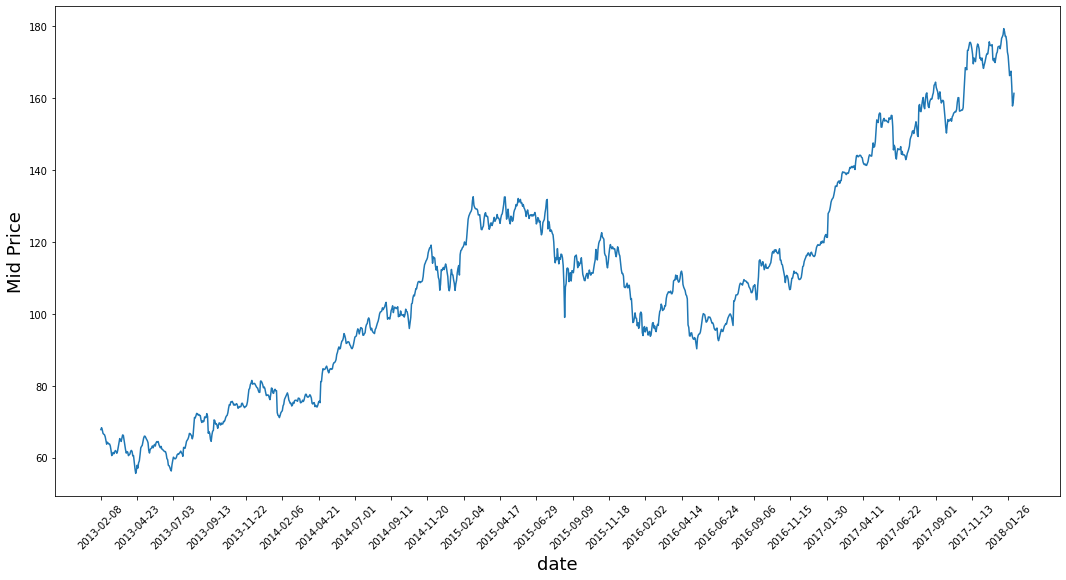

In [15]:
#Data Visualization
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(open + close)/2.0)
plt.xticks(range(0,df.shape[0],50),df['date'].loc[::50],rotation=45)
plt.xlabel('date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [16]:
#calculating mid prices
mid_prices=(open + close)/2.0
mid_prices


0        67.78420
1        68.31640
2        67.67210
3        66.72990
4        66.50775
          ...    
1254    167.47250
1255    163.25000
1256    157.79500
1257    158.93000
1258    161.31250
Length: 1259, dtype: float64

In [17]:
len(df), 1259*0.8

(1259, 1007.2)

In [18]:
#data split gareko traning and testing mah
training_set = mid_prices[:1000]
testing_set = mid_prices[1000:]

In [19]:
#Data normalization
scaler = MinMaxScaler()
train_data = training_set.values.reshape(-1,1)
test_data = testing_set.values.reshape(-1,1)

In [20]:
train_data

array([[ 67.7842 ],
       [ 68.3164 ],
       [ 67.6721 ],
       [ 66.7299 ],
       [ 66.50775],
       [ 66.3578 ],
       [ 65.7921 ],
       [ 64.7528 ],
       [ 63.7185 ],
       [ 64.28995],
       [ 64.04635],
       [ 63.77065],
       [ 63.78565],
       [ 63.2464 ],
       [ 62.03355],
       [ 60.56065],
       [ 60.90165],
       [ 61.4408 ],
       [ 61.07725],
       [ 61.53705],
       [ 61.9728 ],
       [ 61.71635],
       [ 61.19995],
       [ 61.80925],
       [ 62.97065],
       [ 64.0835 ],
       [ 65.28495],
       [ 64.9642 ],
       [ 64.49635],
       [ 65.4635 ],
       [ 66.3049 ],
       [ 66.18395],
       [ 64.89565],
       [ 63.7485 ],
       [ 62.20065],
       [ 61.24225],
       [ 61.6685 ],
       [ 61.53425],
       [ 60.54995],
       [ 60.78995],
       [ 60.9528 ],
       [ 61.69925],
       [ 62.0035 ],
       [ 61.71065],
       [ 60.4892 ],
       [ 60.5578 ],
       [ 58.79065],
       [ 56.9314 ],
       [ 55.60705],
       [ 56.5221 ],


In [21]:
test_data

array([[121.28   ],
       [121.25   ],
       [127.89   ],
       [128.2525 ],
       [128.695  ],
       [129.71   ],
       [131.035  ],
       [131.695  ],
       [132.035  ],
       [132.29   ],
       [133.185  ],
       [134.245  ],
       [135.515  ],
       [135.5075 ],
       [135.41   ],
       [136.465  ],
       [136.77   ],
       [136.955  ],
       [136.285  ],
       [137.035  ],
       [137.035  ],
       [138.84   ],
       [139.48   ],
       [139.28   ],
       [139.3525 ],
       [139.29   ],
       [138.975  ],
       [138.71   ],
       [139.195  ],
       [139.025  ],
       [139.145  ],
       [139.935  ],
       [140.705  ],
       [140.495  ],
       [140.93   ],
       [140.975  ],
       [140.6325 ],
       [141.09   ],
       [141.07   ],
       [140.135  ],
       [142.355  ],
       [143.9    ],
       [144.06   ],
       [143.69   ],
       [143.705  ],
       [144.01   ],
       [144.12   ],
       [143.975  ],
       [143.535  ],
       [143.385  ],


In [22]:
smoothing_window_size = 300
for di in range(0,1200,smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

# normalize the last bit of remaining data
#scaler.fit(train_data[di+smoothing_window_size:,:])
#train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

In [23]:
train_data = train_data.reshape(-1)

# Normalize test data
test_data = scaler.transform(test_data).reshape(-1)

In [24]:
train_data

array([0.4708729 , 0.49145231, 0.46653816, 0.43010464, 0.42151442,
       0.41571606, 0.39384126, 0.35365302, 0.31365812, 0.33575527,
       0.32633561, 0.31567469, 0.31625472, 0.29540269, 0.24850353,
       0.1915486 , 0.20473458, 0.22558274, 0.21152478, 0.22930458,
       0.24615441, 0.23623786, 0.21626941, 0.23983017, 0.28473984,
       0.32777215, 0.3742305 , 0.36182755, 0.34373647, 0.38113477,
       0.4136705 , 0.40899353, 0.35917682, 0.31481818, 0.25496504,
       0.21790509, 0.23438757, 0.22919631, 0.19113485, 0.2004153 ,
       0.20671248, 0.23557663, 0.24734154, 0.23601745, 0.18878573,
       0.19143839, 0.12310524, 0.05121071, 0.        , 0.03538367,
       0.08733682, 0.05662818, 0.11353477, 0.13400204, 0.1990619 ,
       0.27449267, 0.2907064 , 0.30051275, 0.33915231, 0.38094142,
       0.40084994, 0.39878503, 0.38138418, 0.36580462, 0.35285258,
       0.32926282, 0.24723133, 0.21908062, 0.25910838, 0.26609772,
       0.27429933, 0.29527509, 0.2750727 , 0.29692044, 0.31166

In [25]:
#EMA = 0.0
#gamma = 0.1
#for ti in range(1200):
 # EMA = gamma*train_data[ti] + (1-gamma)*EMA
#  train_data[ti] = EMA

# Used for visualization and test purposes
#all_mid_data = np.concatenate([train_data,test_data],axis=0)

EMA = 0.0
gamma = 0.1
for ti in range(900):
    EMA = gamma*train_data[ti] + (1-gamma)*EMA
    train_data[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,test_data],axis=0)

In [26]:
#predicting via averging
window_size = 100
N = train_data.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

for pred_idx in range(window_size,N):

    if pred_idx >= N:
        date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
    else:
        date = df.loc[pred_idx,'date']

    std_avg_predictions.append(np.mean(train_data[pred_idx-window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-train_data[pred_idx])**2)
    std_avg_x.append(date)

print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for standard averaging: 0.02048


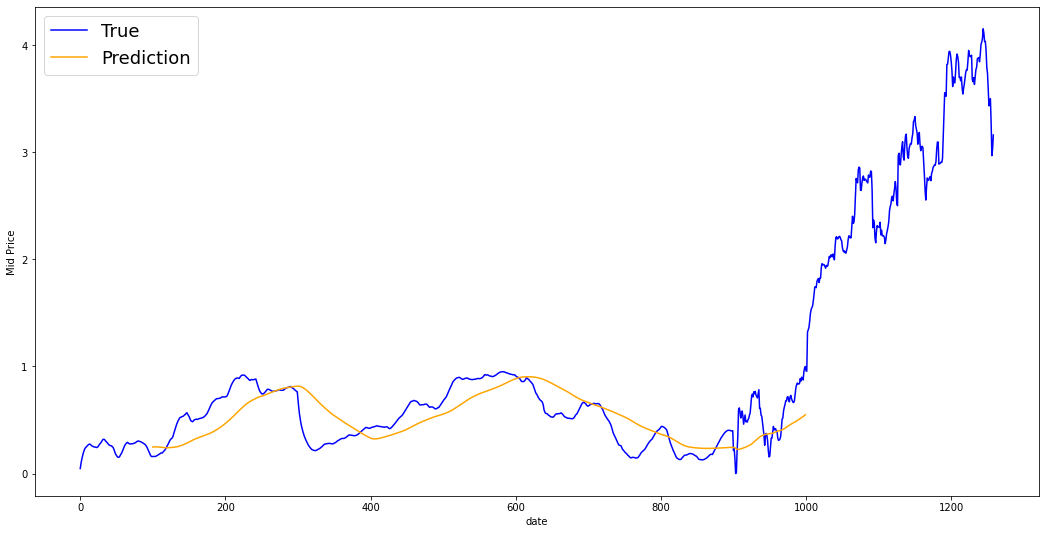

In [27]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_mid_data,color='blue',label='True')
plt.plot(range(window_size,N),std_avg_predictions,color='orange',label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

In [28]:
#exponential moving average
window_size = 100
N = train_data.size

run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.5

for pred_idx in range(1,N):

    running_mean = running_mean*decay + (1.0-decay)*train_data[pred_idx-1]
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1]-train_data[pred_idx])**2)
    run_avg_x.append(date)

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for EMA averaging: 0.00050


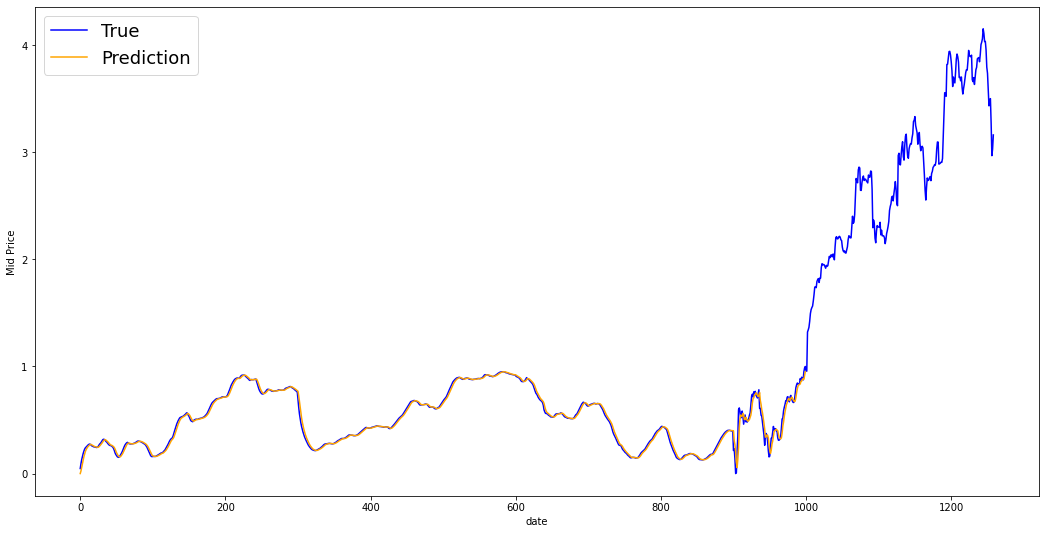

In [29]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(0,N),run_avg_predictions,color='orange', label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()